# Save figures for publication
Author: Pia Rautenstrauch

Date: 2024-09-03

## Requirements
- [x] Fontsize: >= 7
- [x] font: Arial
- [x] dpi: 600


## Other modifications
- [x] random order of plotting of colors in umap (https://github.com/scverse/scanpy/issues/891)

Anaconda environment: scib_no_defaults

In [1]:
# Imports
import os
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import scib
import scanpy as sc
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import rc

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
scib.__version__

'1.1.5'

In [4]:
# From https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html
mm = 1/25.4  # millimeters in inches

In [5]:
sc.set_figure_params(dpi_save=600, dpi=80, transparent=True, format='png', fontsize=7, figsize=(25*mm, 1.2*2/3*25*mm))

In [6]:
plt.rcParams['figure.figsize']

[0.984251968503937, 0.7874015748031495]

In [7]:
# overwrite scanpy/matplotlib default font: chose: Arial

In [8]:
# Need to remove chached fonts

In [9]:
! rm ~/.cache/matplotlib -rf

In [10]:
font_dirs = ["/fast/AG_Ohler/prauten/conda_envs/scib_no_defaults/fonts"]  # The path to the custom font file.

font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [11]:
# change font
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"

In [12]:
plt.rcParams['lines.markersize'] = 3.0

In [13]:
# plt.rcParams["figure.figsize"] = (1.5*2/3, 1.2*2/3)

In [14]:
def plot_umaps(models):
    np.random.seed(61)

    # Collect computed scores, nested dict is simple to convert to pd.DataFrame
    for model in models:
        # Load data
        embedding = ad.AnnData(X=pd.read_csv('data/simulated/counts_matrix_{}.csv'.format(model), index_col=None).values.T, obs=pd.read_csv('data/simulated/cell_metadata_{}.csv'.format(model), index_col=0))
        embedding.obs['Batch'] = embedding.obs['Batch'].astype('category')
        embedding.obs['Cell_type'] = embedding.obs['Cell_type'].astype('category')
        
        
        embedding.obs['Cell_type'] = embedding.obs['Cell_type'].replace({'Cell_type1': 'Cell type 1',\
                                                                        'Cell_type2': 'Cell type 2',\
                                                                        'Cell_type3': 'Cell type 3'})
        
        embedding.obs['Batch'] = embedding.obs['Batch'].replace({'Sample1': 'Batch 1',\
                                                                        'Sample2': 'Batch 2',\
                                                                        'Sample3': 'Batch 3',\
                                                                'Sample4': 'Batch 4'})
        # assign colors
        embedding.uns['Batch_colors'] = ['#882255', '#CC6677', '#332288', '#88CCEE']
        #embedding.uns['cell_type_colors'] = ['#DDAA33', '#117733', '#EE7733']
        embedding.uns['Cell_type_colors'] = ['#993404', '#FEC44F', '#EC7014']

        
        # Normalizing to median total counts
        sc.pp.normalize_total(embedding)
        # Logarithmize the data
        sc.pp.log1p(embedding)
    
        # Create embedding (PCA space) ['X_pca']
        sc.tl.pca(embedding)
        sc.pp.neighbors(embedding, use_rep='X_pca')
        sc.tl.umap(embedding, min_dist=0.3)

        # random plotting order
        embedding = sc.pp.subsample(embedding, fraction=1., copy=True)

        ### Save UMAP visualization as png 
        sc.pl.umap(
            embedding,
            color=['Cell_type', 'Batch'],
            size=3,
            frameon=False,
            ncols=1,
            wspace=-0.2,
            #hspace=0.8,
            save="_{}_sim.png".format(model),
            legend_loc=None,
            title=['','']
            #legend_fontsize='x-small'
        )
        
    ### Save UMAP visualization as png 
    sc.pl.umap(
            embedding,
            color=['Cell_type', 'Batch'],
            size=3,
            frameon=False,
            ncols=1,
            wspace=-0.2,
            #hspace=0.8,
            save="_{}_sim_legend.png".format(model),
            legend_fontsize='x-small',
            title=['', '']
    )


In [15]:
models = ['None', 'Mild', 'Intermediate', 'Strong', 'Overcorrected']

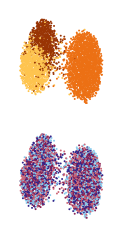

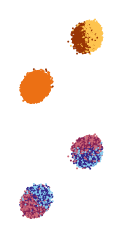

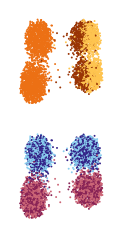

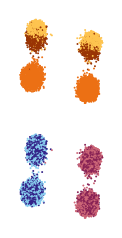

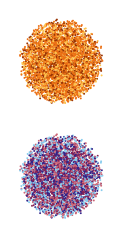

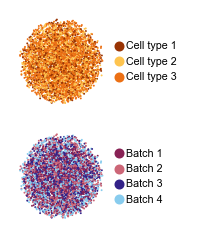

In [16]:
plot_umaps(models)

In [17]:
import matplotlib as mpl

font_settings = {key: value for key, value in mpl.rcParams.items() if 'font' in key.lower()}
for key, value in font_settings.items():
    print(f"{key}: {value}")


font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'Comic Neue', 'Comic Sans MS', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Chicago', 'Charcoal', 'Impact', 'Western', 'xkcd script', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['Arial']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 7.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: 6.44
legend.title_fontsize: 18.0
mathtext.fontset: dejavusans
pdf.fonttype: 3
pdf.use14corefonts: False
pgf.rcfonts: True
ps.fonttype: 3
svg.fonttype: path


In [18]:
print("Default font size:", plt.rcParams['font.size'])
print("Title font size:", plt.rcParams['axes.titlesize'])
print("Axes label font size:", plt.rcParams['axes.labelsize'])
print("X-tick label font size:", plt.rcParams['xtick.labelsize'])
print("Y-tick label font size:", plt.rcParams['ytick.labelsize'])
print("Legend font size:", plt.rcParams['legend.fontsize'])


Default font size: 7.0
Title font size: 7.0
Axes label font size: 7.0
X-tick label font size: 7.0
Y-tick label font size: 7.0
Legend font size: 6.44


In [ ]:
# rename batch to sample for consistency with manuscript text

In [13]:
def plot_umaps(models):
    np.random.seed(61)

    # Collect computed scores, nested dict is simple to convert to pd.DataFrame
    for model in models:
        # Load data
        embedding = ad.AnnData(X=pd.read_csv('data/simulated/counts_matrix_{}.csv'.format(model), index_col=None).values.T, obs=pd.read_csv('data/simulated/cell_metadata_{}.csv'.format(model), index_col=0))
        embedding.obs['Batch'] = embedding.obs['Batch'].astype('category')
        embedding.obs['Cell_type'] = embedding.obs['Cell_type'].astype('category')
        
        
        embedding.obs['Cell_type'] = embedding.obs['Cell_type'].replace({'Cell_type1': 'Cell type 1',\
                                                                        'Cell_type2': 'Cell type 2',\
                                                                        'Cell_type3': 'Cell type 3'})
        
        embedding.obs['Batch'] = embedding.obs['Batch'].replace({'Sample1': 'Sample 1',\
                                                                        'Sample2': 'Sample 2',\
                                                                        'Sample3': 'Sample 3',\
                                                                'Sample4': 'Sample 4'})
        # assign colors
        embedding.uns['Batch_colors'] = ['#882255', '#CC6677', '#332288', '#88CCEE']
        #embedding.uns['cell_type_colors'] = ['#DDAA33', '#117733', '#EE7733']
        embedding.uns['Cell_type_colors'] = ['#993404', '#FEC44F', '#EC7014']

        
        # Normalizing to median total counts
        sc.pp.normalize_total(embedding)
        # Logarithmize the data
        sc.pp.log1p(embedding)
    
        # Create embedding (PCA space) ['X_pca']
        sc.tl.pca(embedding)
        sc.pp.neighbors(embedding, use_rep='X_pca')
        sc.tl.umap(embedding, min_dist=0.3)

        # random plotting order
        embedding = sc.pp.subsample(embedding, fraction=1., copy=True)

    
    ### Save UMAP visualization as png 
    sc.pl.umap(
            embedding,
            color=['Cell_type', 'Batch'],
            size=3,
            frameon=False,
            ncols=1,
            wspace=-0.2,
            #hspace=0.8,
            save="_{}_sim_legend_renamed.png".format(model),
            legend_fontsize='x-small',
            title=['', '']
    )


In [14]:
models = ['Overcorrected']

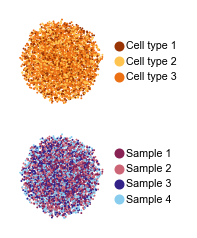

In [15]:
plot_umaps(models)